#### Ranjeet Kumar

# Census Income

### Project Description

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

### Description of fnlwgt (final weight)

The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:
1.	A single cell estimate of the population 16+ for each state.
2.	Controls for Hispanic Origin by age and sex.
3.	Controls by Race, age and sex.


We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

### Dataset Link-

https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv

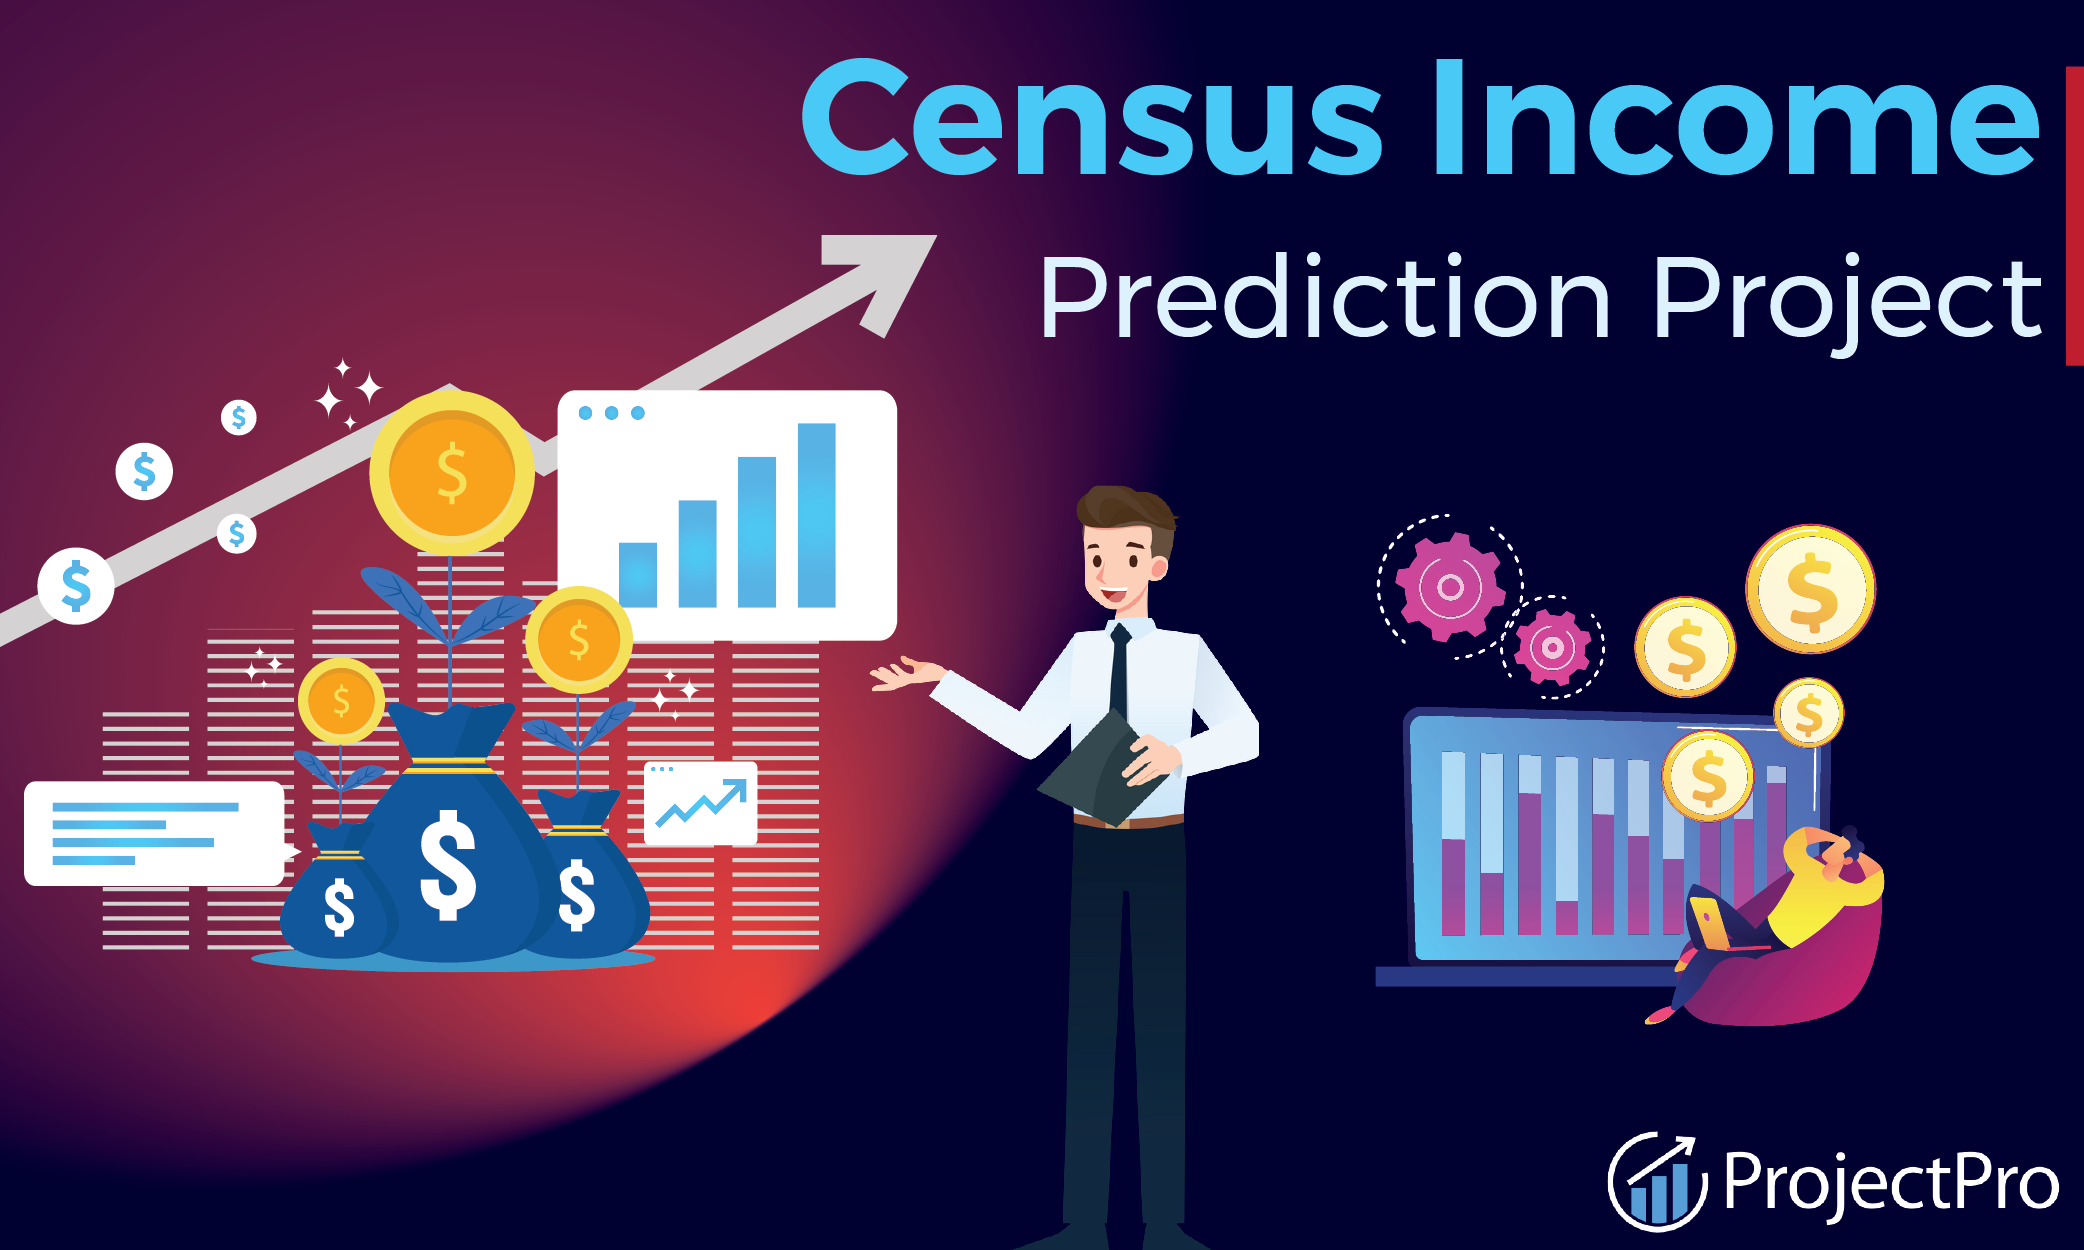

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv")

In [3]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
df.shape

(32560, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,32560.0,38.581634,13.640642,17.0,28.0,37.0,48.0,90.0
Fnlwgt,32560.0,189781.814373,105549.764924,12285.0,117831.5,178363.0,237054.5,1484705.0
Education_num,32560.0,10.080590,2.572709,1.0,9.0,10.0,12.0,16.0
Capital_gain,32560.0,1077.615172,7385.402999,0.0,0.0,0.0,0.0,99999.0
Capital_loss,32560.0,87.306511,402.966116,0.0,0.0,0.0,0.0,4356.0
Hours_per_week,32560.0,40.437469,12.347618,1.0,40.0,40.0,45.0,99.0


In [7]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

<AxesSubplot:>

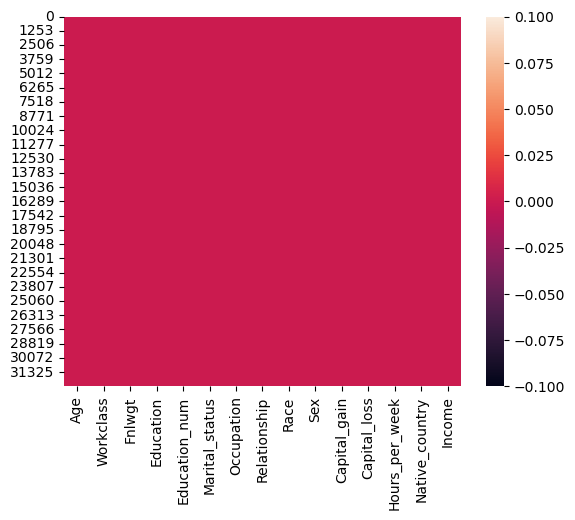

In [8]:
sns.heatmap(df.isnull())

#### No Null Values present in the data


In [9]:
# Check unique values:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [10]:
for i in df.columns:
    print( i ,'have unique values = ',df[i].unique(),'\n')

Age have unique values =  [50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 39 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87] 

Workclass have unique values =  [' Self-emp-not-inc' ' Private' ' State-gov' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked'] 

Fnlwgt have unique values =  [ 83311 215646 234721 ...  34066  84661 257302] 

Education have unique values =  [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th'] 

Education_num have unique values =  [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8] 

Marital_status have unique values =  [' Married-civ-spouse' ' Divorced' ' Married-spouse-absent'
 ' Never-married' ' Separated' ' Married-AF-spouse' ' Widowed'] 

Occupation have unique values =  [' 

# EDA

In [11]:
# Target Variable  : Income

In [12]:
df['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

In [13]:
# This is imbalanced data, we have to balanced this as well

<AxesSubplot:xlabel='Income', ylabel='count'>

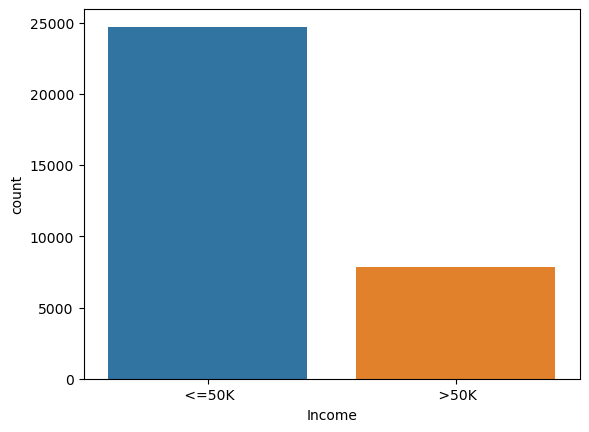

In [14]:
sns.countplot(df['Income'])

# Age

<AxesSubplot:xlabel='Age', ylabel='Density'>

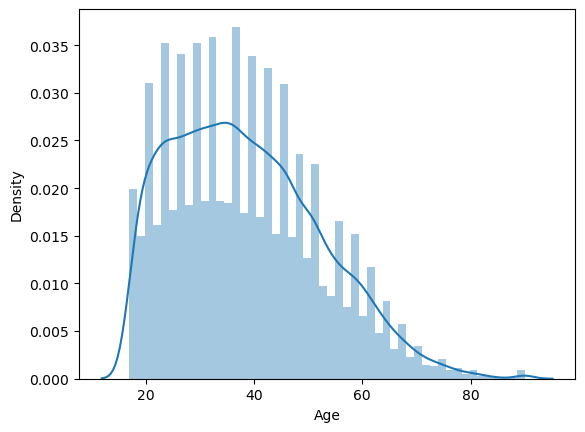

In [15]:
sns.distplot(df['Age'])

Text(0.5, 1.0, 'Age distribution')

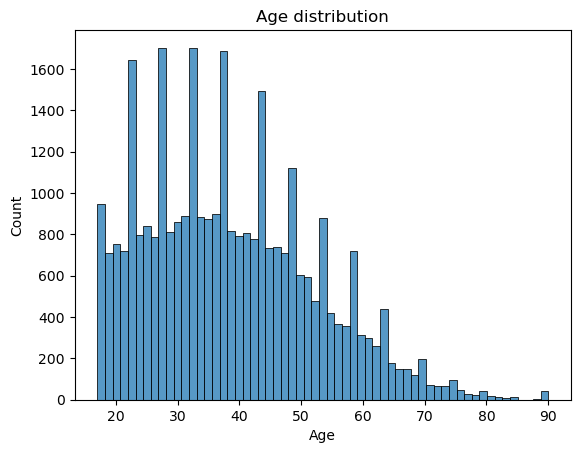

In [16]:
sns.histplot(df['Age'])
plt.title('Age distribution')

 Age data is right skewed

In [17]:
df['Workclass'].unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

<AxesSubplot:xlabel='Workclass', ylabel='count'>

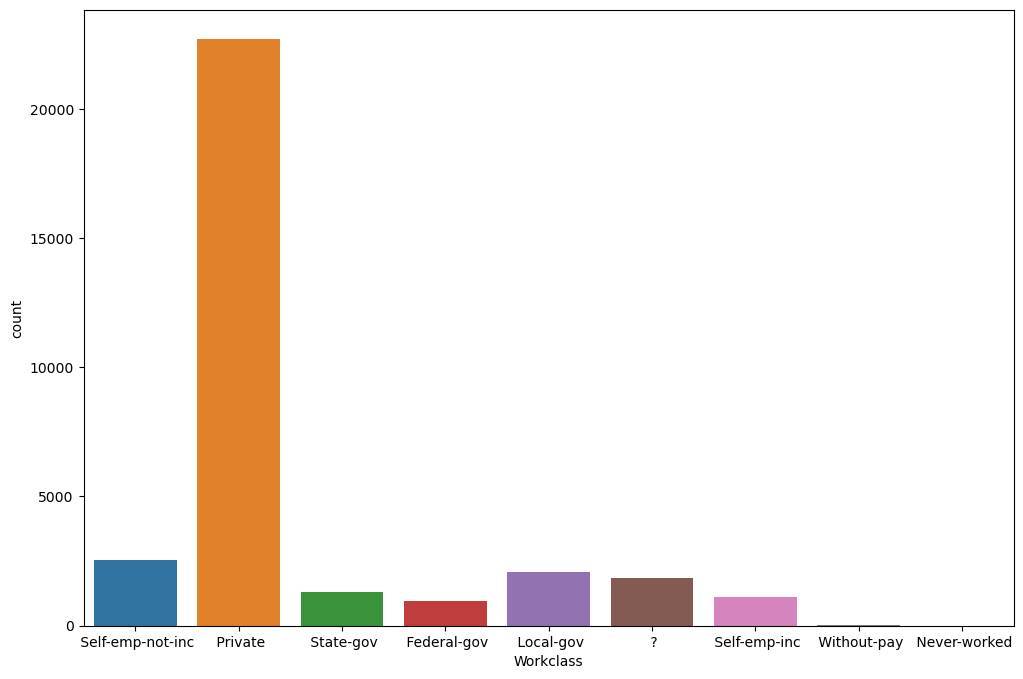

In [18]:
plt.figure(figsize=(12,8))
sns.countplot(df['Workclass'])

([<matplotlib.patches.Wedge at 0x1bf805698b0>,
 [Text(-0.6382930911712503, 0.8958693709258343, ' Private'),
  Text(-0.09614160158809627, -1.0957904874765414, ' Self-emp-not-inc'),
  Text(0.3870941794944444, -1.029639789538809, ' Local-gov'),
  Text(0.7406590513513429, -0.8132798839583633, ' ?'),
  Text(0.9491955757802714, -0.5559026523764384, ' State-gov'),
  Text(1.0518455289897355, -0.3219021328669688, ' Self-emp-inc'),
  Text(1.0948632169908754, -0.10618161837338717, ' Federal-gov'),
  Text(1.099995985562683, -0.0029718253619576878, ' Without-pay'),
  Text(1.0999997490710822, -0.0007429963368566515, ' Never-worked')],
 [Text(-0.3481598679115911, 0.48865602050500045, '69.71%'),
  Text(-0.052440873593507055, -0.5977039022599315, '7.80%'),
  Text(0.21114227972424238, -0.5616217033848049, '6.43%'),
  Text(0.40399584619164153, -0.44360720943183446, '5.64%'),
  Text(0.5177430413346934, -0.3032196285689664, '3.98%'),
  Text(0.5737339249034921, -0.17558298156380112, '3.43%'),
  Text(0.59719

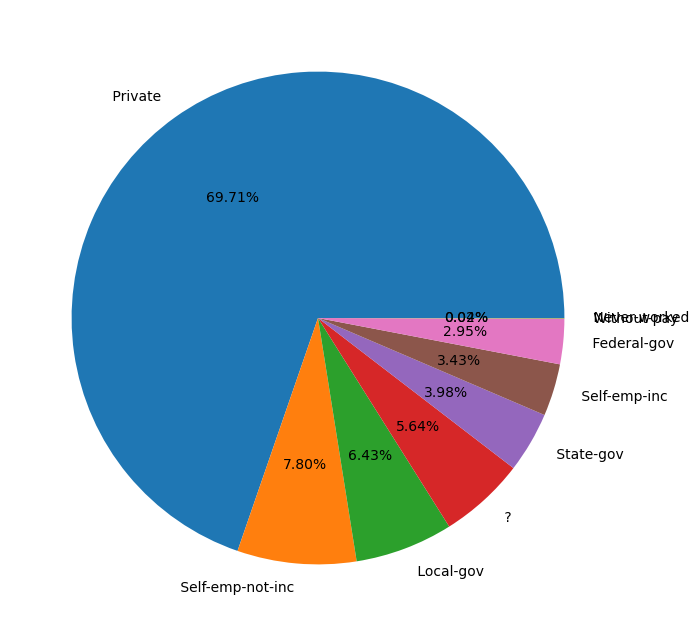

In [19]:
plt.figure(figsize=(12,8))
plt.pie(df['Workclass'].value_counts().values,labels=df['Workclass'].value_counts().index,autopct='%1.2f%%')

# Education

In [20]:
df['Education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

Text(0, 0.5, 'No of peoples')

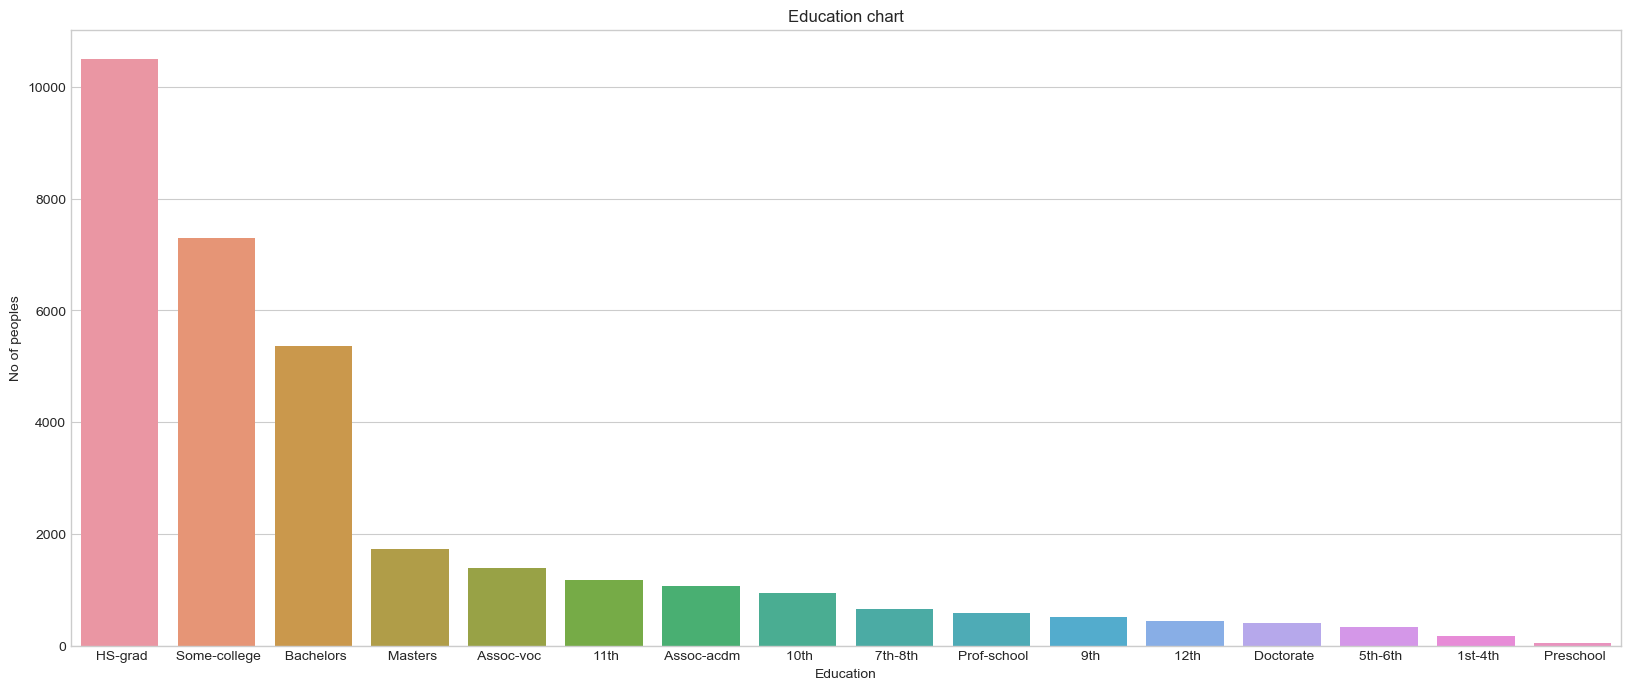

In [21]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(20,8))
sns.countplot(df['Education'],order=df['Education'].value_counts().index)
plt.title('Education chart')
plt.xlabel('Education')
plt.ylabel('No of peoples')

From the Sample,
MAximum peoples have done HS-grad, then Some-collegue, Bachelors

In [22]:
df['Education_num'].unique()

array([13,  9,  7, 14,  5, 10, 12, 11,  4, 16, 15,  3,  6,  2,  1,  8],
      dtype=int64)

Text(0, 0.5, 'Count of peoples')

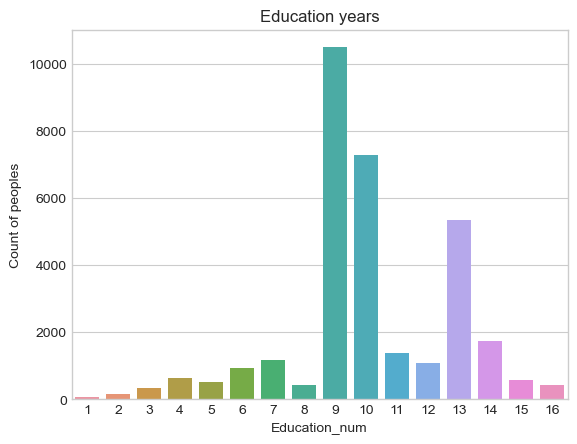

In [23]:
sns.countplot(df['Education_num'])
plt.title('Education years')
plt.ylabel('Count of peoples')

 Maximum peoples have taken 9years education and then 10 years

In [24]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

# Marital_status

In [25]:
df['Marital_status'].unique()

array([' Married-civ-spouse', ' Divorced', ' Married-spouse-absent',
       ' Never-married', ' Separated', ' Married-AF-spouse', ' Widowed'],
      dtype=object)

Text(0.5, 1.0, 'Marrige Distribution')

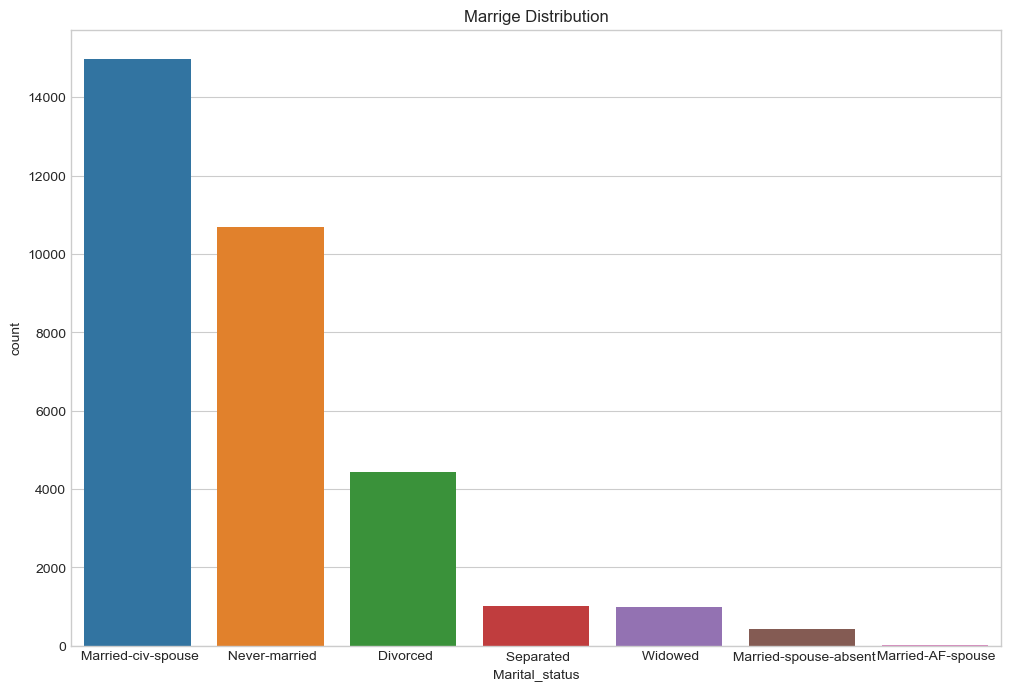

In [26]:
plt.figure(figsize=(12,8))
sns.countplot(df['Marital_status'],order=df['Marital_status'].value_counts().index)
plt.title('Marrige Distribution')

([<matplotlib.patches.Wedge at 0x1bf8190a1c0>,
 [Text(0.13803501708558066, 1.0913048767682585, ' Married-civ-spouse'),
  Text(-0.7827548151178912, -0.7728485617569305, ' Never-married'),
  Text(0.6810034412960271, -0.8638485474566527, ' Divorced'),
  Text(1.0233080239964072, -0.40353523764916543, ' Separated'),
  Text(1.082048081689935, -0.1979190463576769, ' Widowed'),
  Text(1.0988978136033434, -0.04923002394669188, ' Married-spouse-absent'),
  Text(1.0999972916242746, -0.002440987353635856, ' Married-AF-spouse')],
 [Text(0.07529182750122582, 0.5952572055099591, '46.00%'),
  Text(-0.4269571718824861, -0.4215537609583257, '32.81%'),
  Text(0.37145642252510563, -0.4711901167945378, '13.65%'),
  Text(0.5581680130889494, -0.22011012962681747, '3.15%'),
  Text(0.5902080445581462, -0.10795584346782375, '3.05%'),
  Text(0.5993988074200054, -0.026852740334559207, '1.28%'),
  Text(0.5999985227041498, -0.0013314476474377396, '0.07%')])

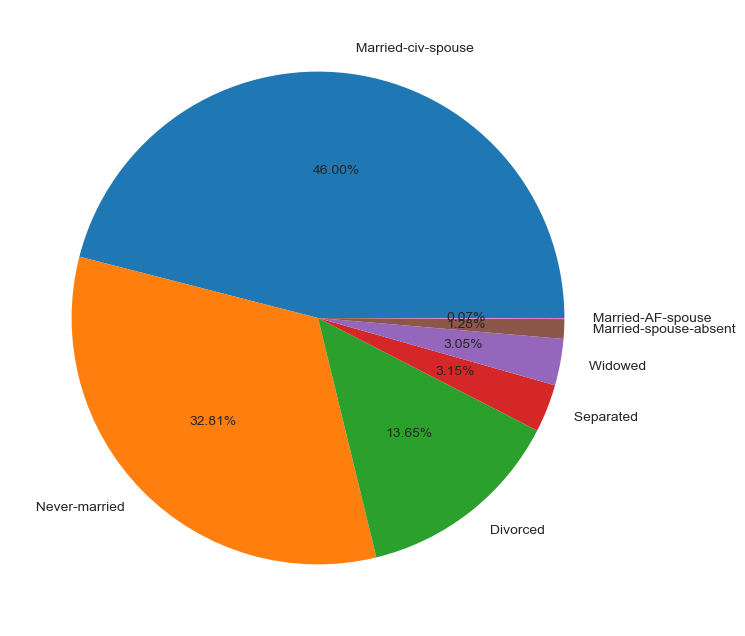

In [27]:
plt.figure(figsize=(12,8))
plt.pie(df['Marital_status'].value_counts().values,labels=df['Marital_status'].value_counts().index,autopct='%1.2f%%')

# Occupation|

In [28]:
df['Occupation'].unique()

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

Text(0, 0.5, 'Peoples count')

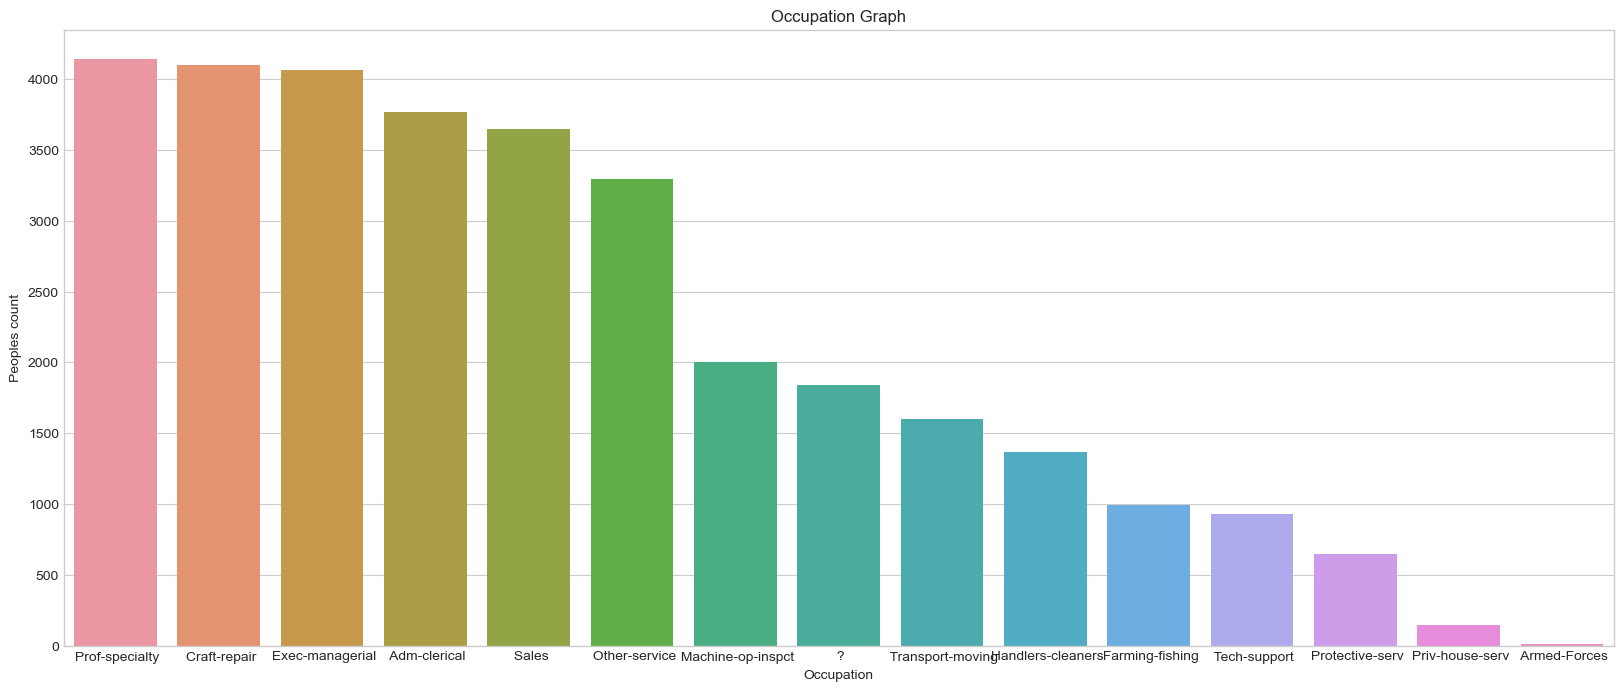

In [29]:
plt.figure(figsize=(20,8))
sns.countplot(df['Occupation'], order=df['Occupation'].value_counts().index)
plt.title('Occupation Graph')
plt.ylabel('Peoples count')

# Relationship

In [30]:
df['Relationship'].unique()

array([' Husband', ' Not-in-family', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

Text(0, 0.5, 'Peoples count')

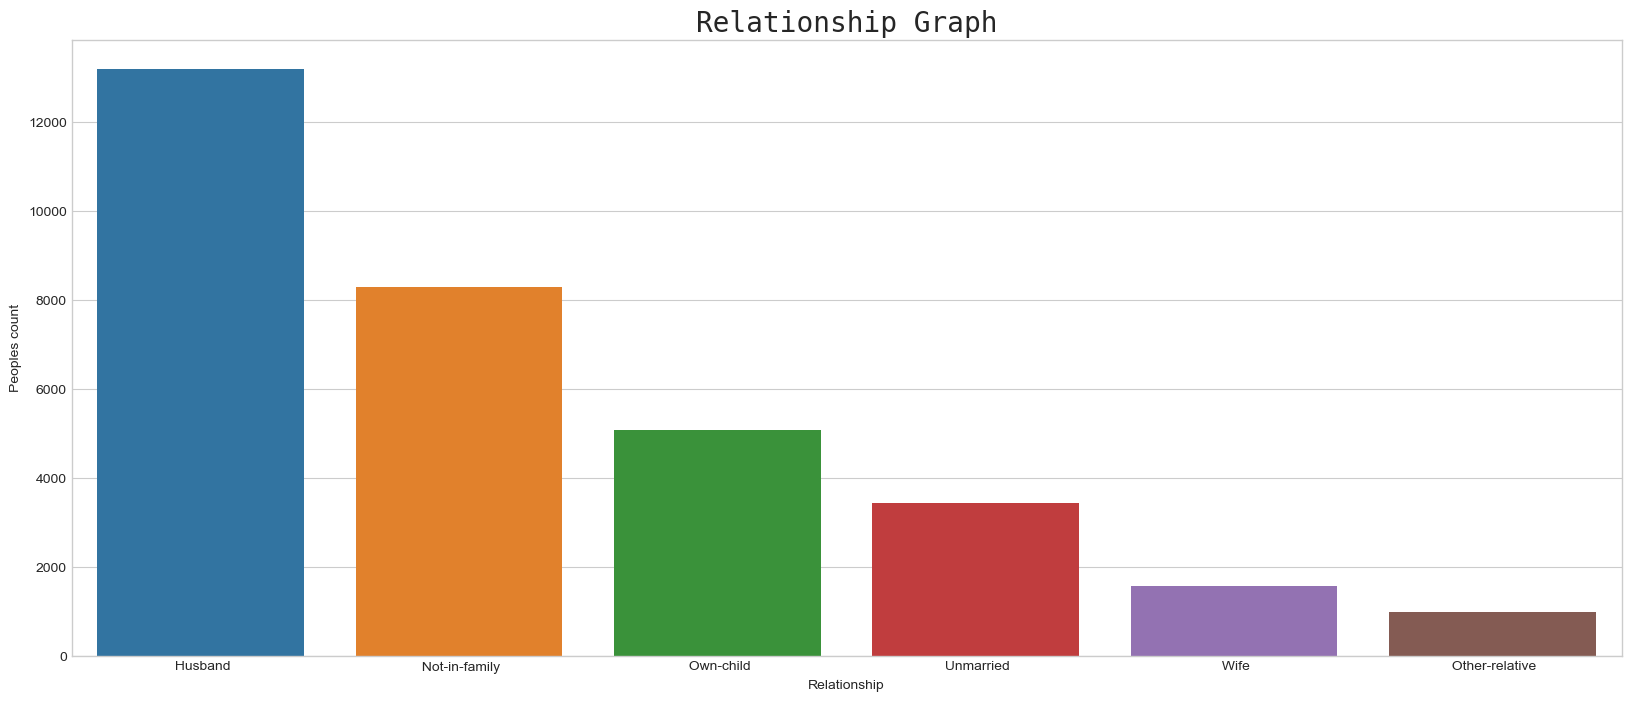

In [31]:
plt.figure(figsize=(20,8))
sns.countplot(df['Relationship'], order=df['Relationship'].value_counts().index)
plt.title('Relationship Graph',fontdict={'fontname':'monospace','fontsize':20})
plt.ylabel('Peoples count')

# Race

<AxesSubplot:xlabel='Race', ylabel='count'>

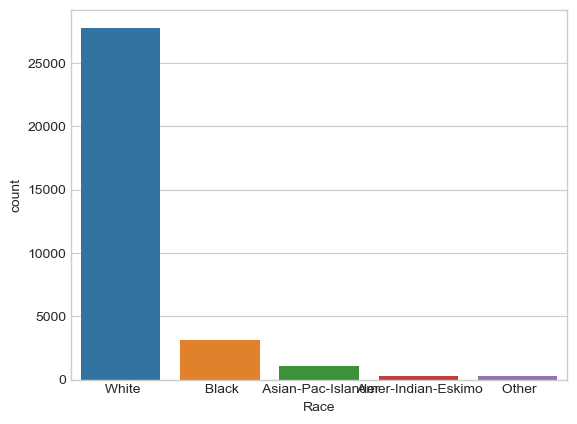

In [32]:
sns.countplot(df['Race'])

In [33]:
df['Race'].value_counts()

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64

Text(0, 0.5, 'People counts')

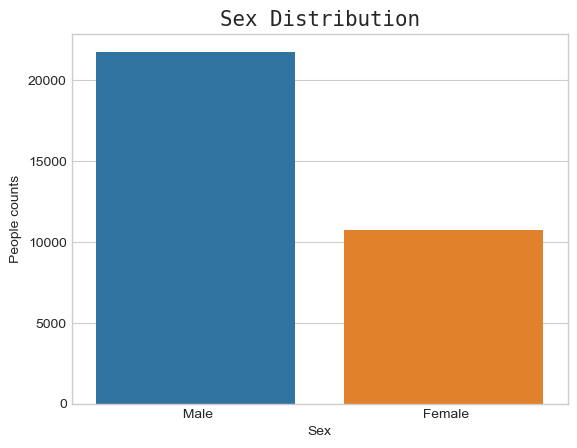

In [34]:
sns.countplot(df['Sex'])
plt.title('Sex Distribution',fontdict={'fontname':'monospace','fontsize':15})
plt.ylabel('People counts')

# Capital_gain

<AxesSubplot:xlabel='Capital_gain', ylabel='Density'>

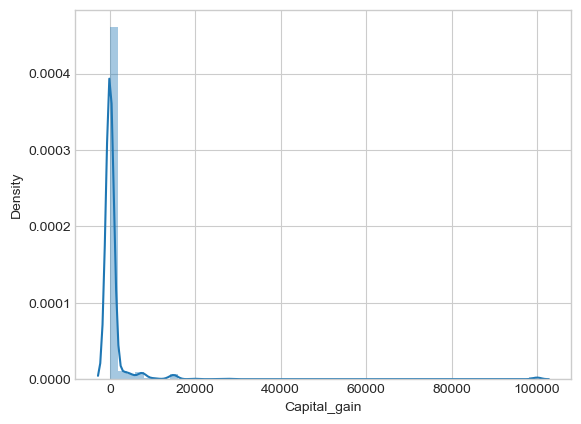

In [35]:

sns.distplot(df['Capital_gain'])

 right skewed data

# Capital_loss

<AxesSubplot:xlabel='Capital_loss', ylabel='Density'>

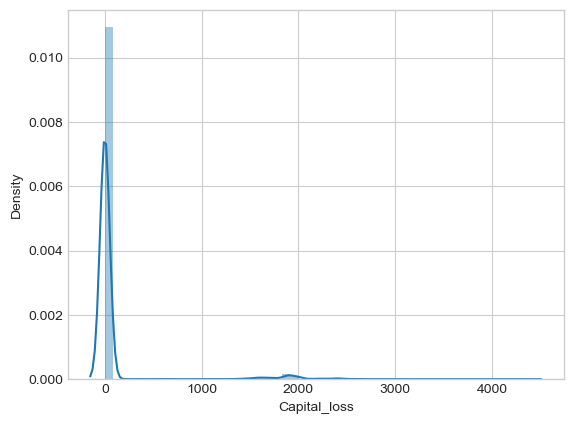

In [36]:
sns.distplot(df['Capital_loss'])

 Right skewed data

# Hours_per_week

In [37]:
df['Hours_per_week'].unique()

array([13, 40, 16, 45, 50, 80, 30, 35, 60, 20, 52, 44, 15, 25, 38, 43, 55,
       48, 58, 32, 70,  2, 22, 56, 41, 28, 36, 24, 46, 42, 12, 65,  1, 10,
       34, 75, 98, 33, 54,  8,  6, 64, 19, 18, 72,  5,  9, 47, 37, 21, 26,
       14,  4, 59,  7, 99, 53, 39, 62, 57, 78, 90, 66, 11, 49, 84,  3, 17,
       68, 27, 85, 31, 51, 77, 63, 23, 87, 88, 73, 89, 97, 94, 29, 96, 67,
       82, 86, 91, 81, 76, 92, 61, 74, 95], dtype=int64)

<AxesSubplot:xlabel='Hours_per_week', ylabel='count'>

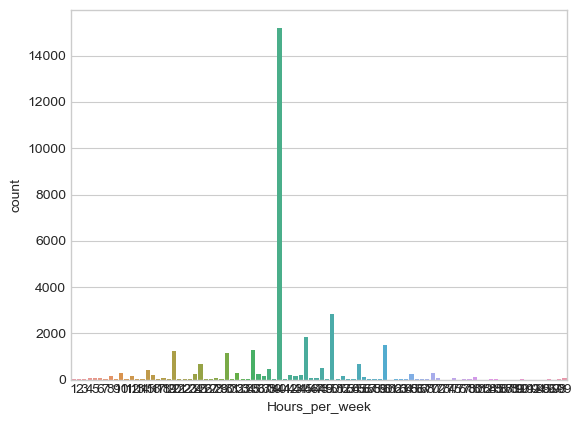

In [38]:
sns.countplot(df['Hours_per_week'])

In [39]:
hours=df['Hours_per_week'].value_counts().head(10)
hours

40    15216
50     2819
45     1824
60     1475
35     1297
20     1224
30     1149
55      694
25      674
48      517
Name: Hours_per_week, dtype: int64

Text(0.5, 0, 'working hours')

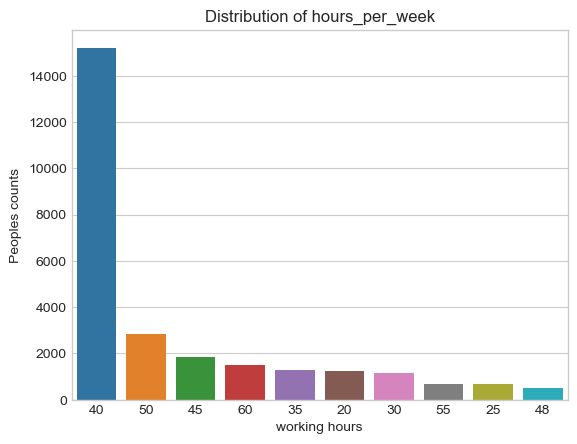

In [40]:
sns.barplot(hours.index,hours.values,order=hours.index)
plt.title('Distribution of hours_per_week')
plt.ylabel('Peoples counts')
plt.xlabel('working hours')

# Bivarient Analysis

In [41]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

Text(0.5, 1.0, 'Age Distribution')

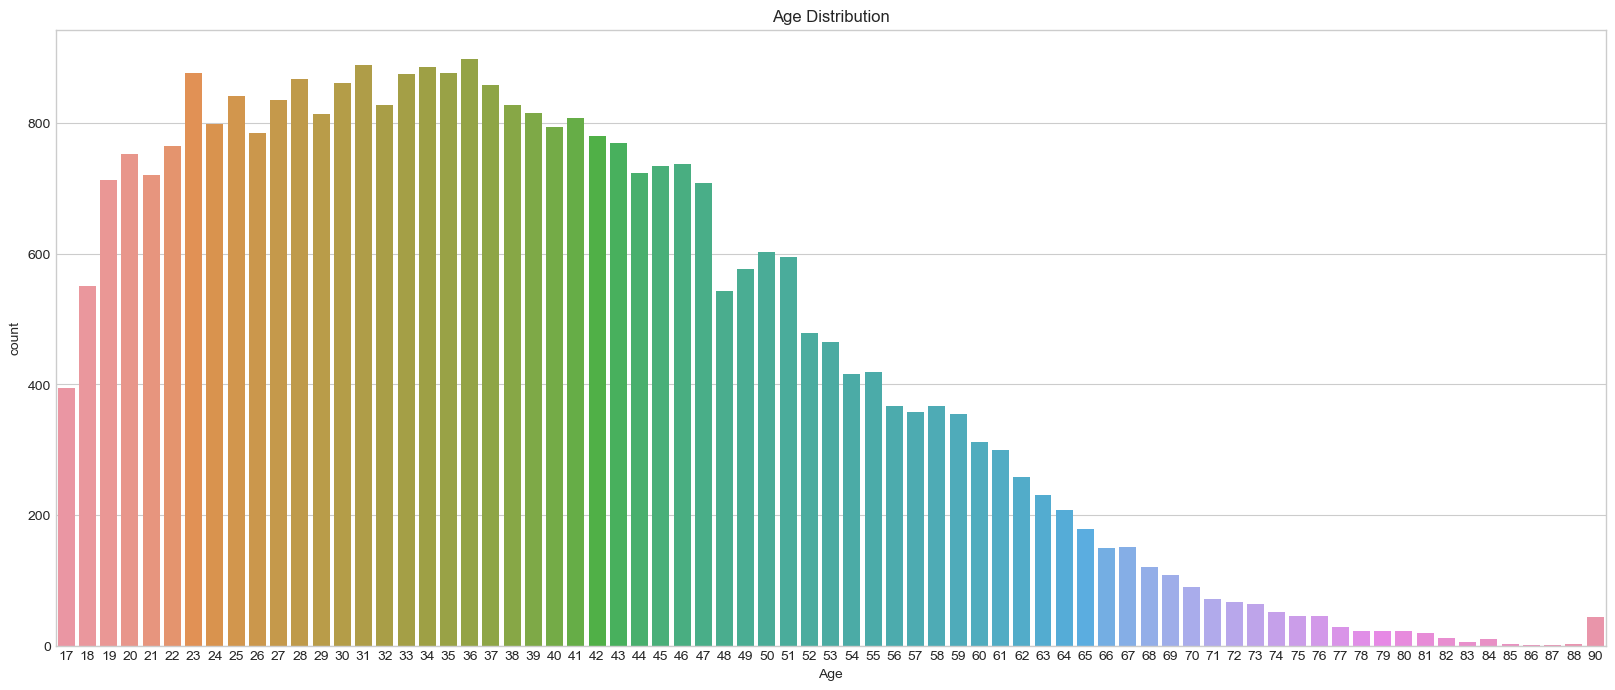

In [42]:
plt.figure(figsize=(20,8))
sns.countplot(df['Age'])
plt.title('Age Distribution')

Text(0.5, 1.0, 'Age vs Income Distribution')

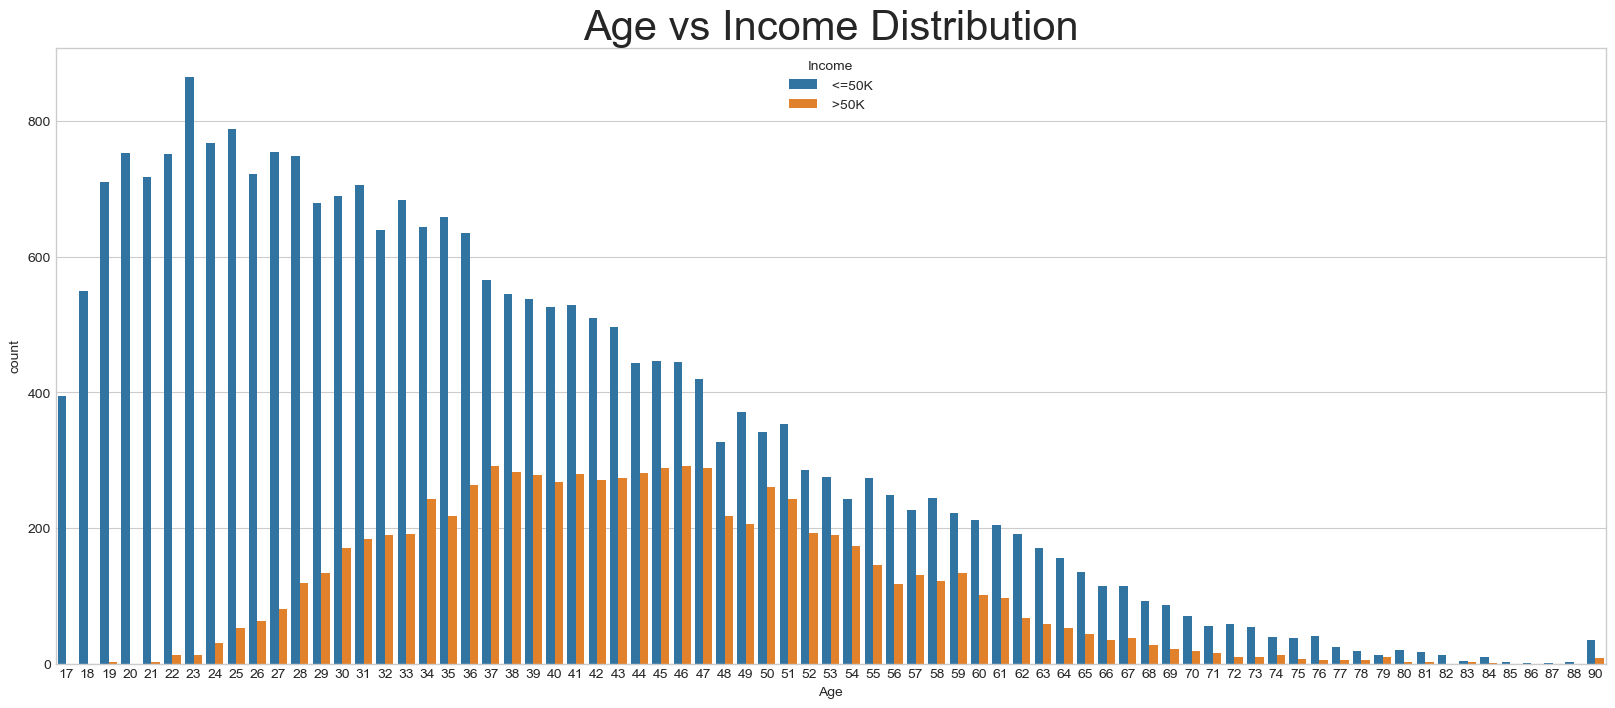

In [43]:
plt.figure(figsize=(20,8))
sns.countplot(df['Age'],hue=df['Income'])
plt.title('Age vs Income Distribution',fontdict={'fontsize':30})

 More Peoples between 36 years to 47 years have earned more than 50K
 Peoples started to earn at age 17, from 17 to 41 majority earn below 50k

In [46]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

Text(0.5, 1.0, ' Distribution of Income across WorkClass')

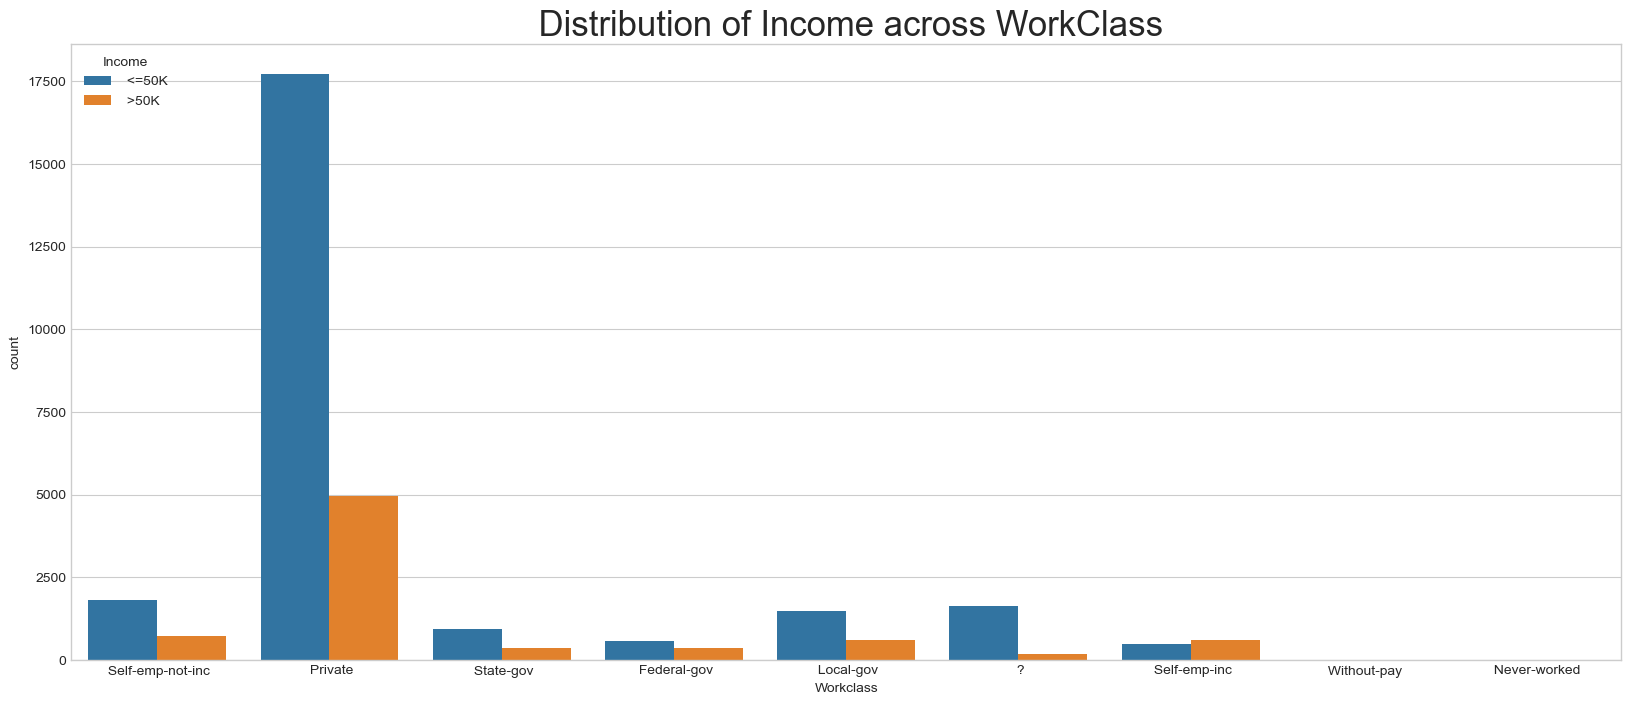

In [47]:
plt.figure(figsize=(20,8))
sns.countplot(df['Workclass'],hue='Income', data=df)
plt.title(' Distribution of Income across WorkClass',fontdict={'fontsize':25})

 In wvery woork class, most people argeeting income <50k, However selfwmploid peoples are able to earn more than >50k

Text(0.5, 1.0, ' Distribution of Income across Education')

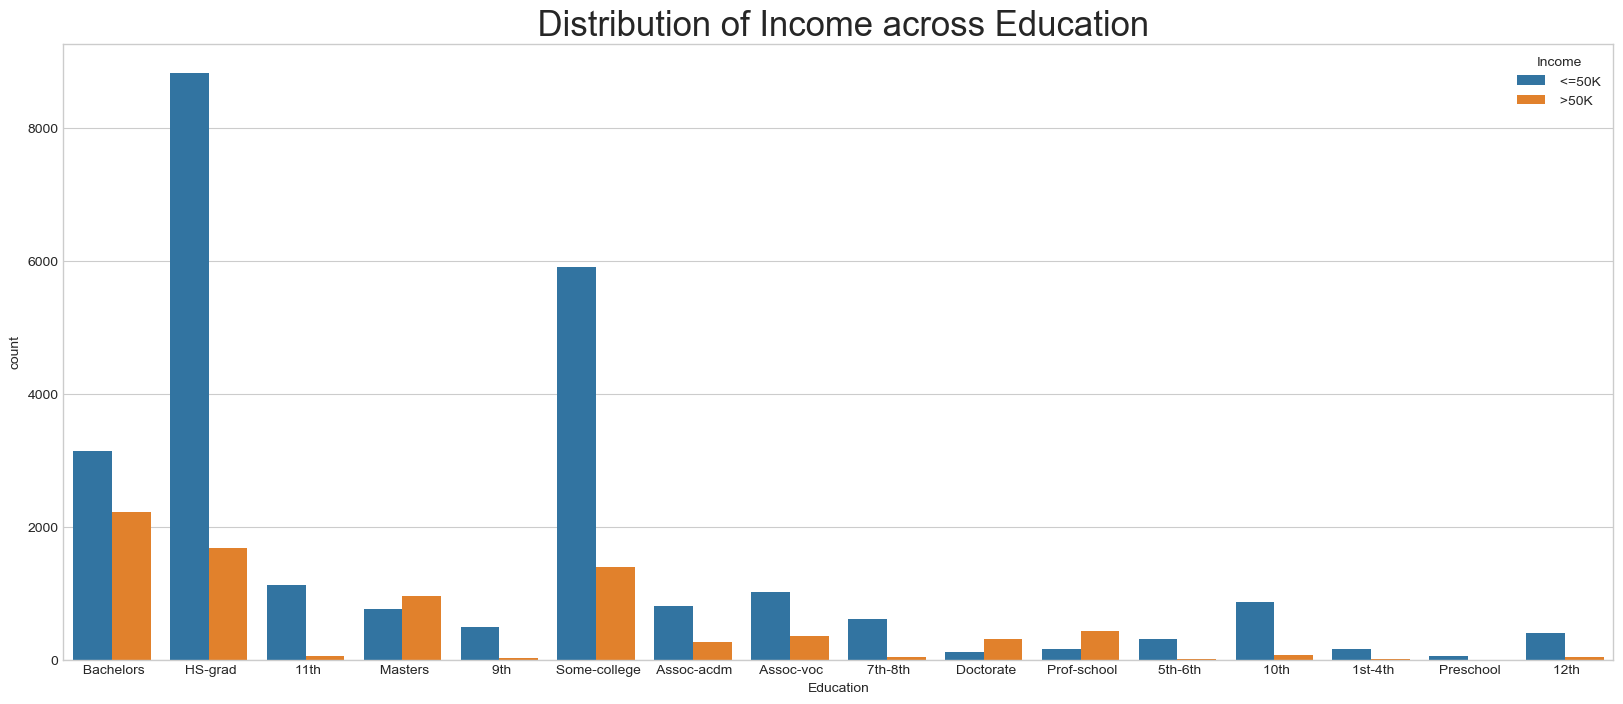

In [48]:
plt.figure(figsize=(20,8))
sns.countplot(df['Education'],hue='Income', data=df)
plt.title(' Distribution of Income across Education',fontdict={'fontsize':25})


 More persons in Doctorate and Prof-School qualified persons got more than >50K

Text(0.5, 1.0, ' Distribution of Income across Education_num')

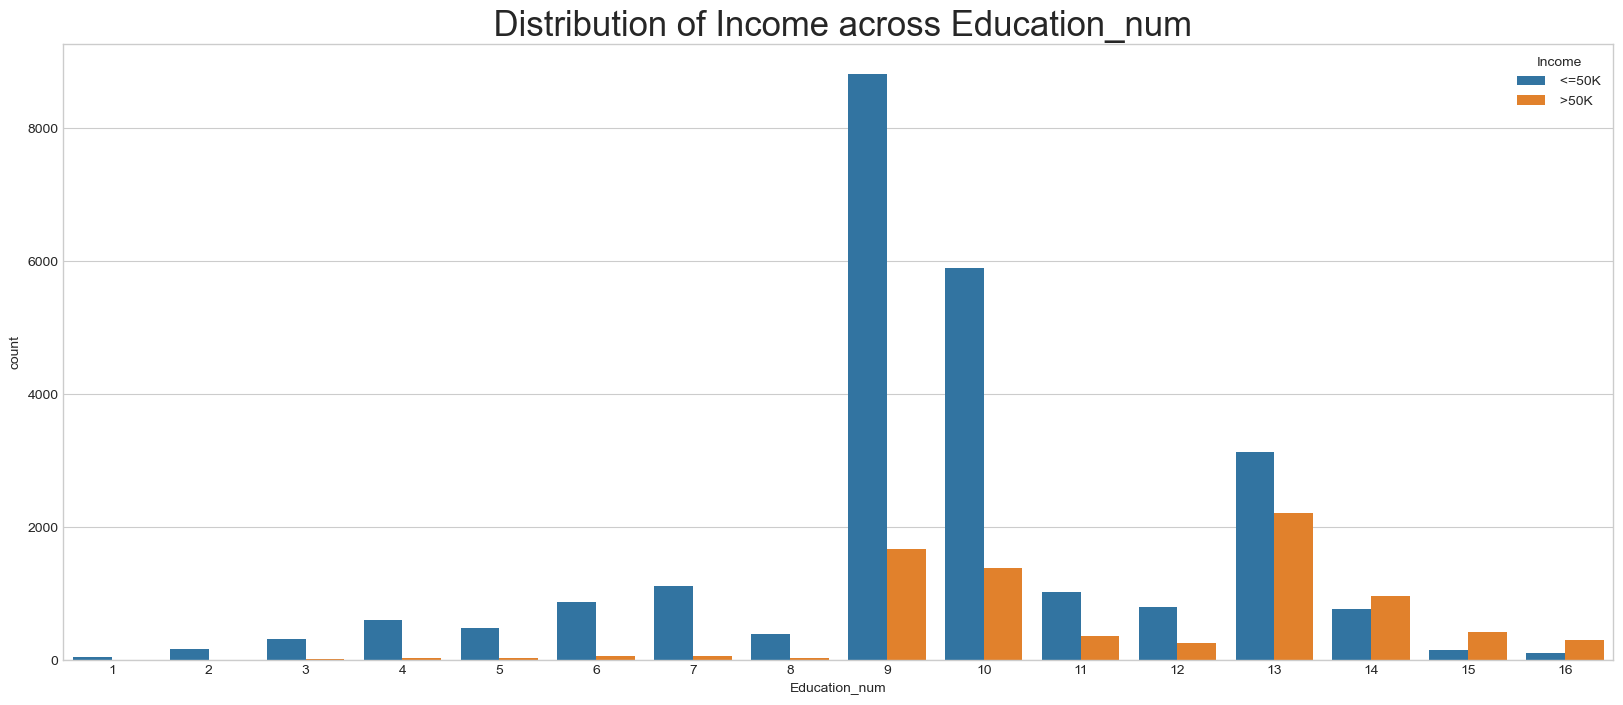

In [50]:
plt.figure(figsize=(20,8))
sns.countplot(df['Education_num'],hue='Income', data=df)
plt.title(' Distribution of Income across Education_num',fontdict={'fontsize':25})

Text(0.5, 1.0, ' Distribution of Income across Marital_status')

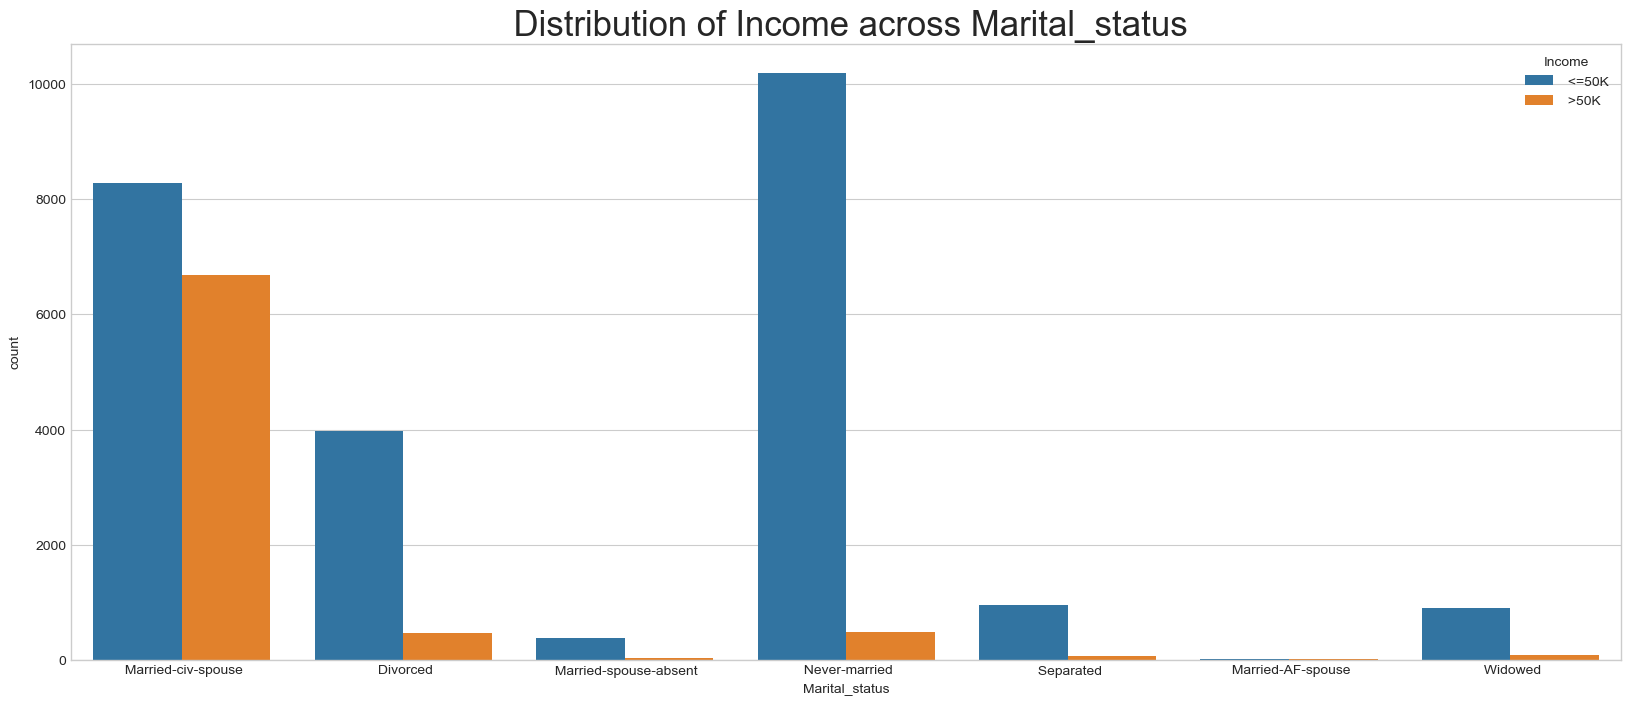

In [51]:

plt.figure(figsize=(20,8))
sns.countplot(df['Marital_status'],hue='Income', data=df)
plt.title(' Distribution of Income across Marital_status',fontdict={'fontsize':25})

Text(0.5, 1.0, ' Distribution of Income across Race')

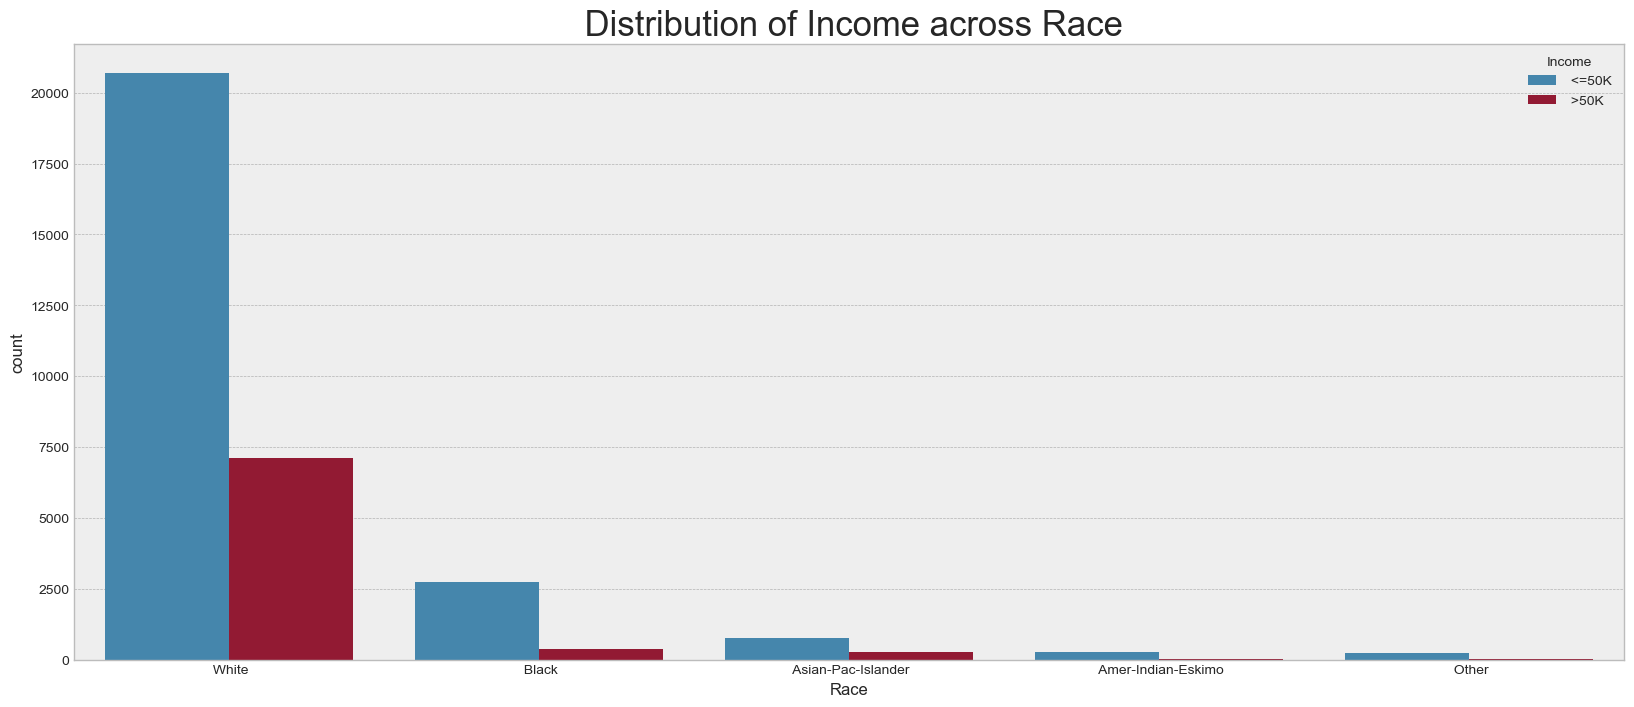

In [52]:
plt.style.use('bmh')
plt.figure(figsize=(20,8))
sns.countplot(df['Race'],hue='Income', data=df)
plt.title(' Distribution of Income across Race',fontdict={'fontsize':25})

Text(0.5, 1.0, ' Distribution of Income Sex')

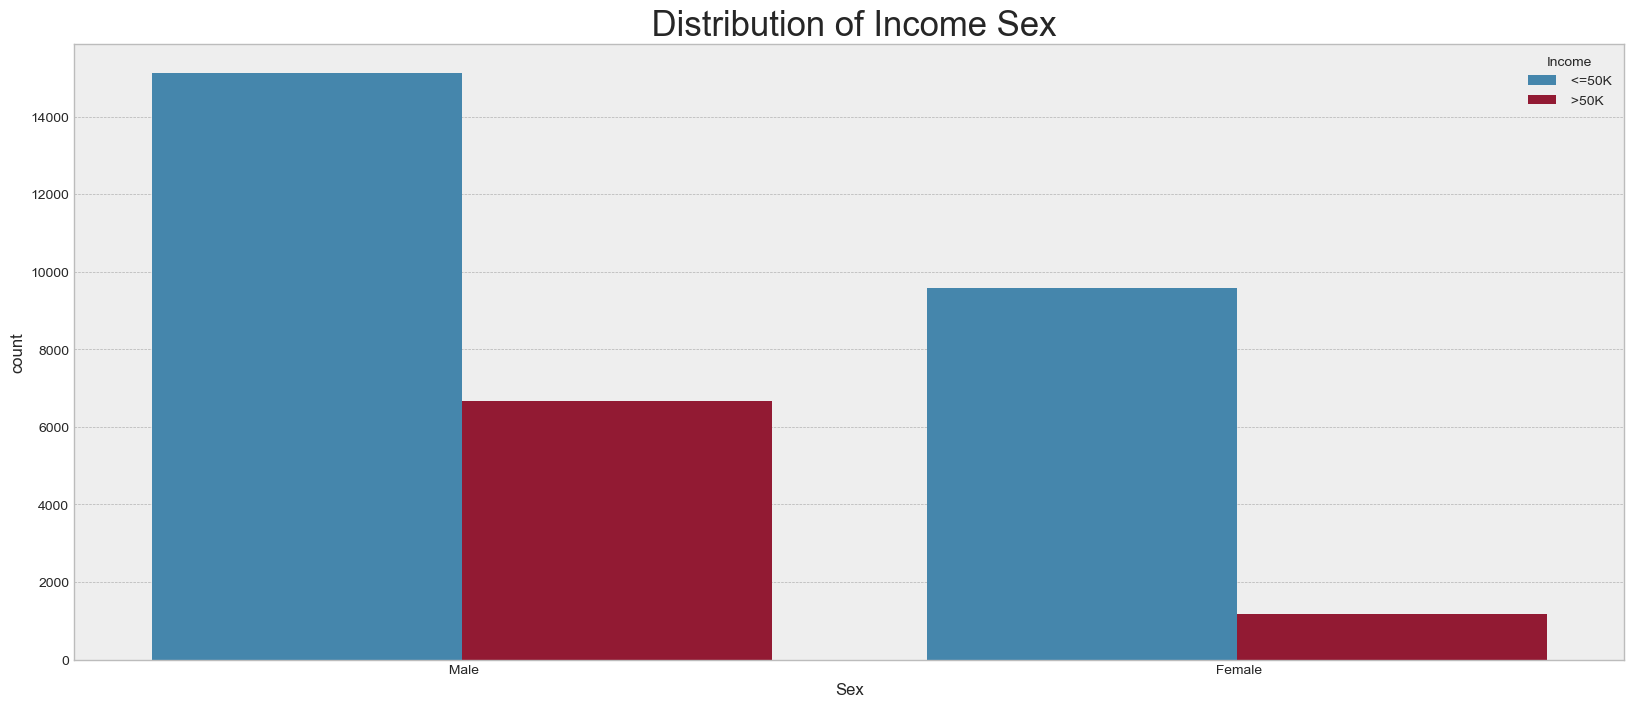

In [53]:
plt.figure(figsize=(20,8))
sns.countplot(df['Sex'],hue='Income', data=df)
plt.title(' Distribution of Income Sex',fontdict={'fontsize':25})

<AxesSubplot:xlabel='Age', ylabel='Hours_per_week'>

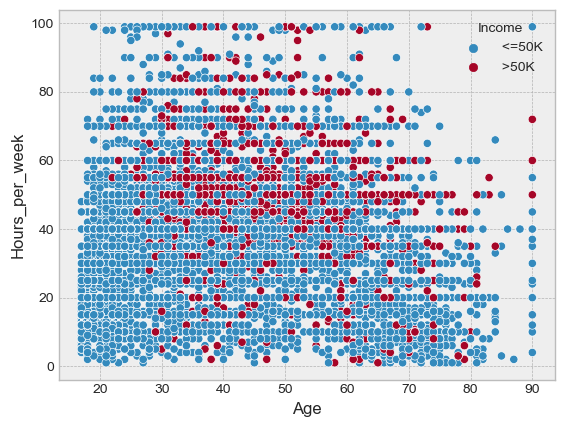

In [54]:
sns.scatterplot('Age','Hours_per_week',hue='Income', data=df)

 After 70yr age, Mostly peoples works toll 60hrs per week

In [56]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

 Lets analyse correelation with target variable

In [57]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

In [58]:
df['Income']=le.fit_transform(df['Income'])

In [59]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0


Multivarient Analysis

In [60]:
df.corr()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week,Income
Age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756,0.234039
Fnlwgt,-0.076646,1.000000,-0.043159,0.000437,-0.010259,-0.018770,-0.009481
Education_num,0.036527,-0.043159,1.000000,0.122627,0.079932,0.148127,0.335182
Capital_gain,0.077674,0.000437,0.122627,1.000000,-0.031614,0.078409,0.223333
Capital_loss,0.057775,-0.010259,0.079932,-0.031614,1.000000,0.054256,0.150523
Hours_per_week,0.068756,-0.018770,0.148127,0.078409,0.054256,1.000000,0.229690
Income,0.234039,-0.009481,0.335182,0.223333,0.150523,0.229690,1.000000


 Correlation with target variablessns.heatmap(df.corr(),annot=True,linecolor='white',linewidths=.25)

 Correlation with target variabel
 
 Age ahs correlation with income  .23
 
 Education_num  has correlation .34
 
 Capital gain has correlation .22
 
 Hours_per_week has correlation .23


Final_Weight have low correlation with target feature = -.0095, its very very low

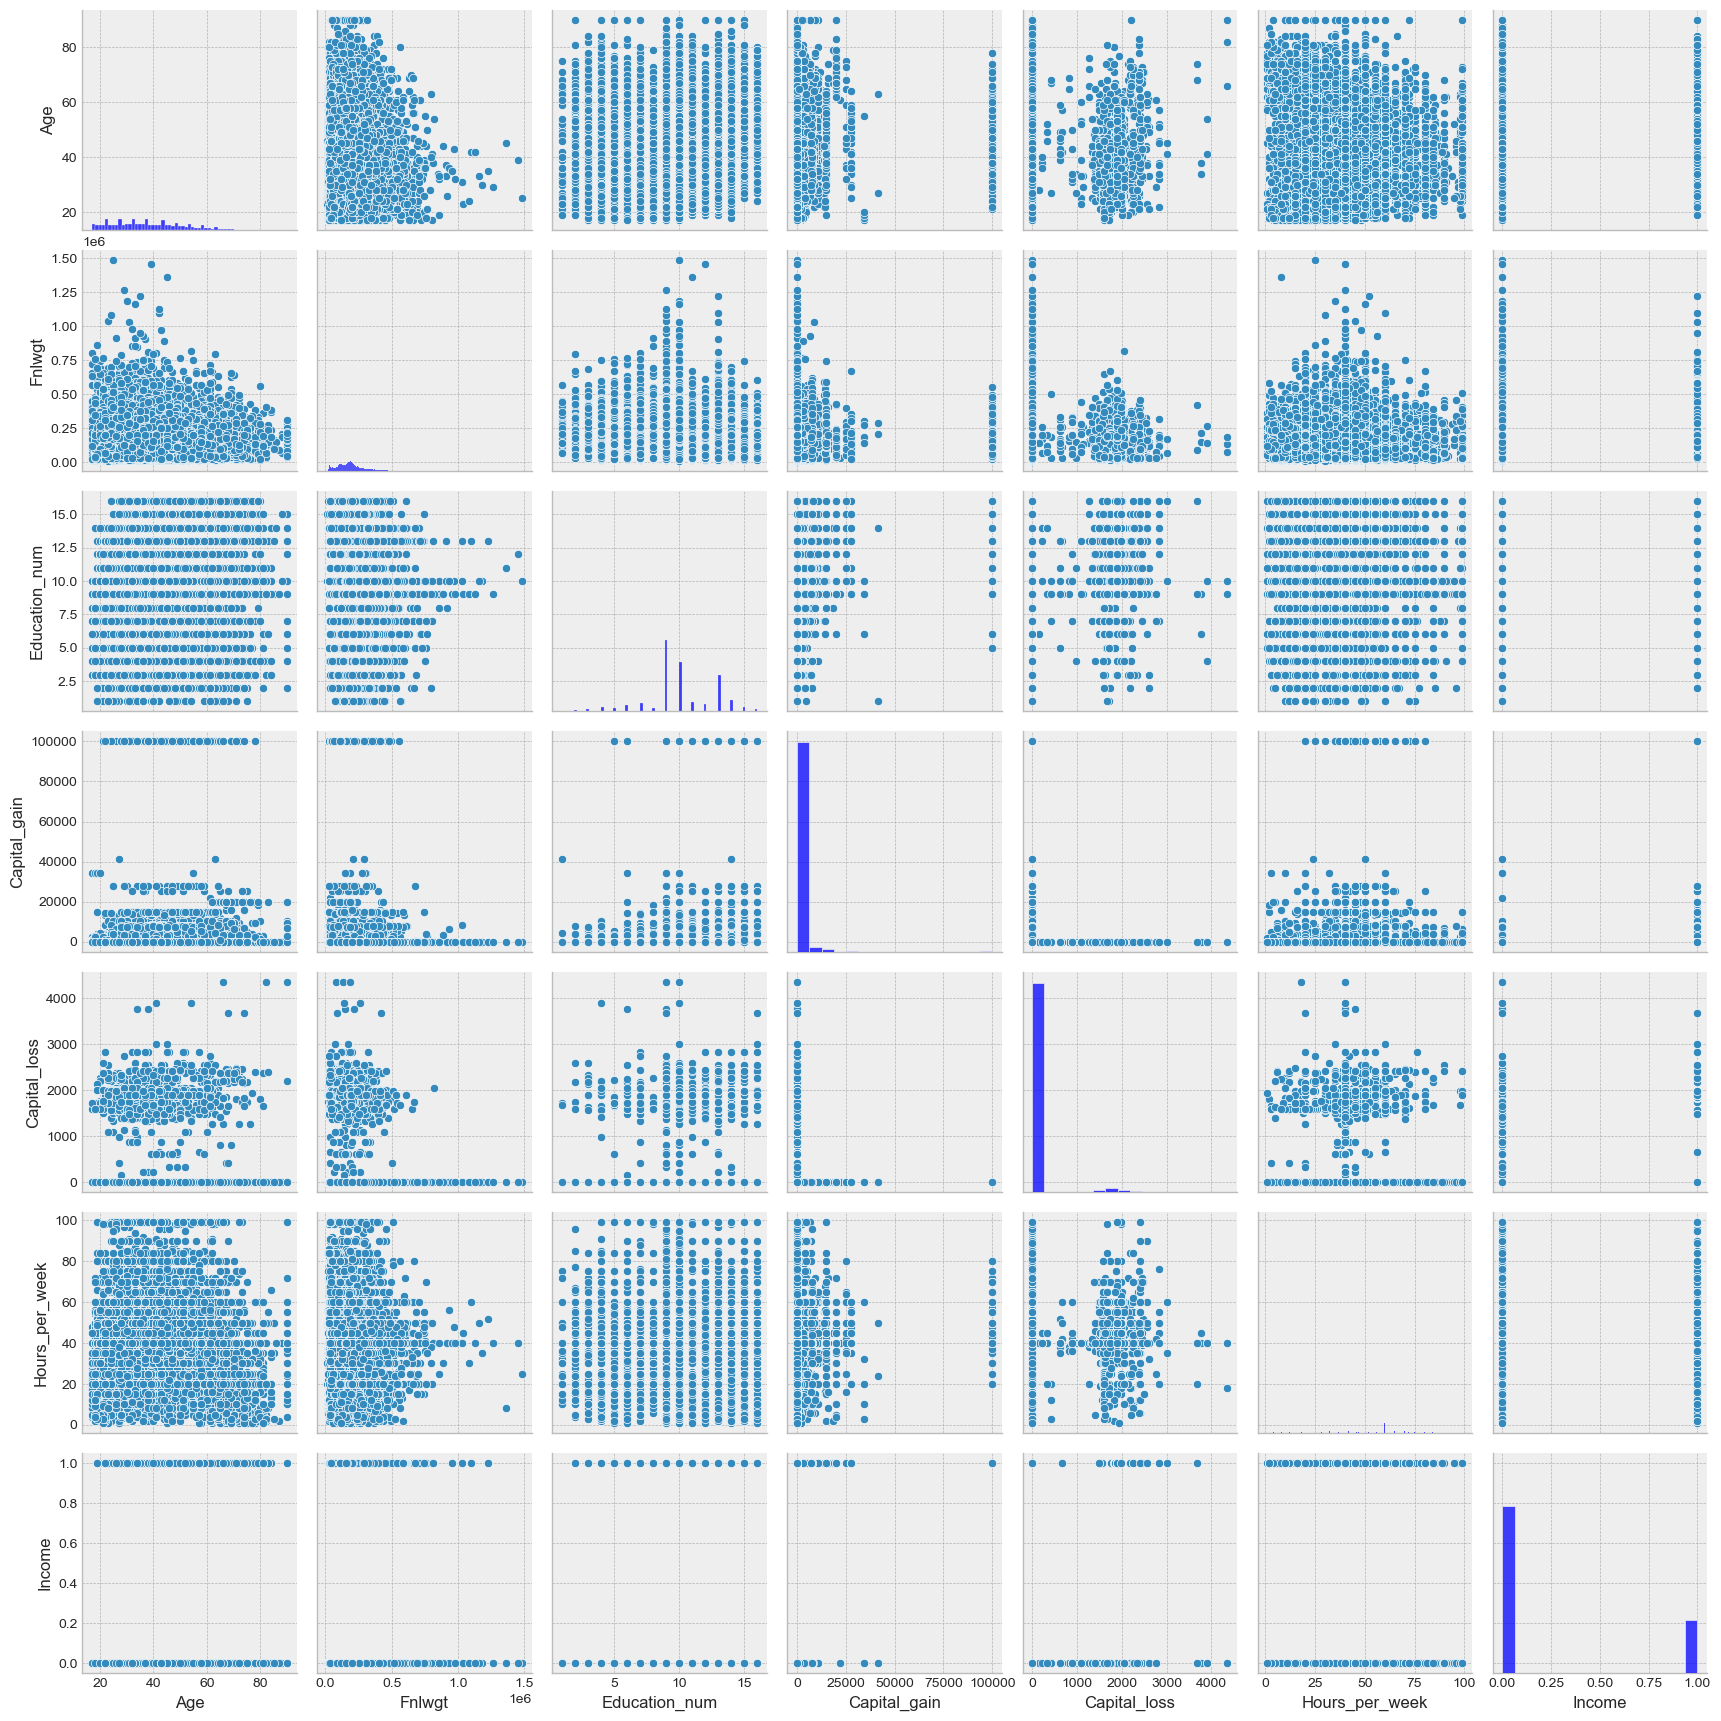

In [61]:
sns.pairplot(df)

# Handle missing values

here missing values are by ' ?' in categorical fetures, 

In [62]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [63]:
df[['Workclass','Occupation','Native_country']]

,Workclass,Occupation,Native_country
0,Self-emp-not-inc,Exec-managerial,United-States
1,Private,Handlers-cleaners,United-States
2,Private,Handlers-cleaners,United-States
3,Private,Prof-specialty,Cuba
4,Private,Exec-managerial,United-States
...,...,...,...
32555,Private,Tech-support,United-States
32556,Private,Machine-op-inspct,United-States
32557,Private,Adm-clerical,United-States
32558,Private,Adm-clerical,United-States


In [64]:
df['Workclass'].unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

Mode replacement

In [65]:
df['Workclass'].mode()

0     Private
Name: Workclass, dtype: object

In [66]:
df['Workclass'].mode()[0]

' Private'

In [67]:
# replace ? with Nan
df=df.replace(' ?',np.nan)

In [68]:
for i in ['Workclass','Occupation','Native_country']:
    df[i].fillna(df[i].mode()[0], inplace=True)

In [69]:
df.isin([' ?']).sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [70]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [71]:
num=df.select_dtypes(np.number)
num

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week,Income
0,50,83311,13,0,0,13,0
1,38,215646,9,0,0,40,0
2,53,234721,7,0,0,40,0
3,28,338409,13,0,0,40,0
4,37,284582,14,0,0,40,0
...,...,...,...,...,...,...,...
32555,27,257302,12,0,0,38,0
32556,40,154374,9,0,0,40,1
32557,58,151910,9,0,0,40,0
32558,22,201490,9,0,0,20,0


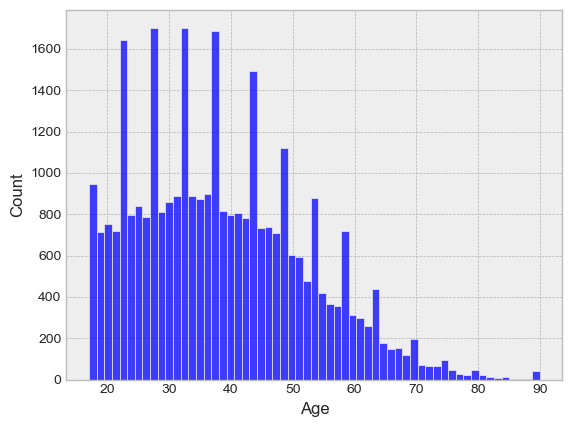

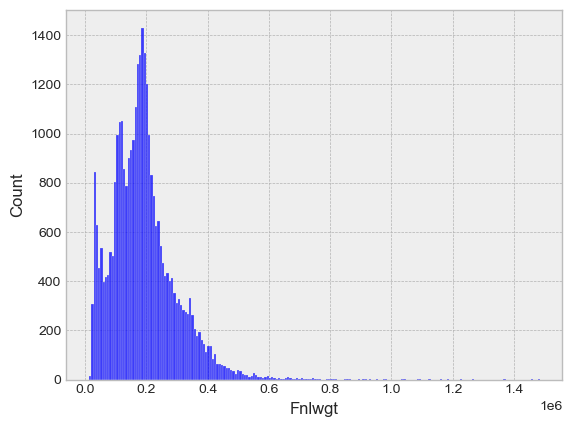

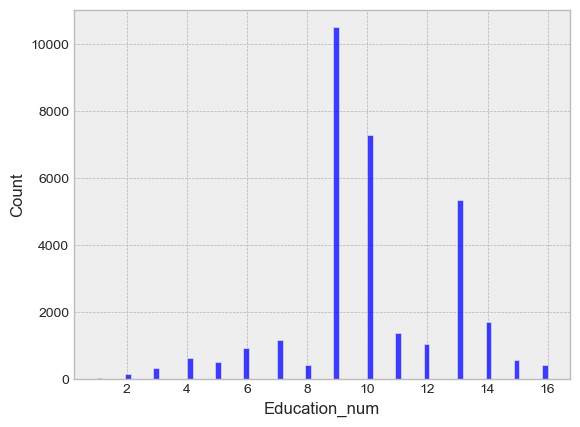

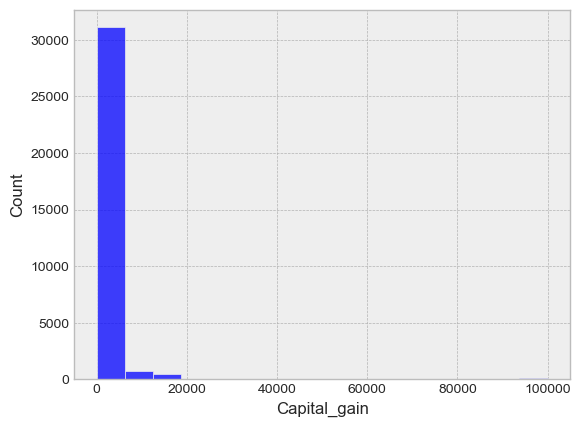

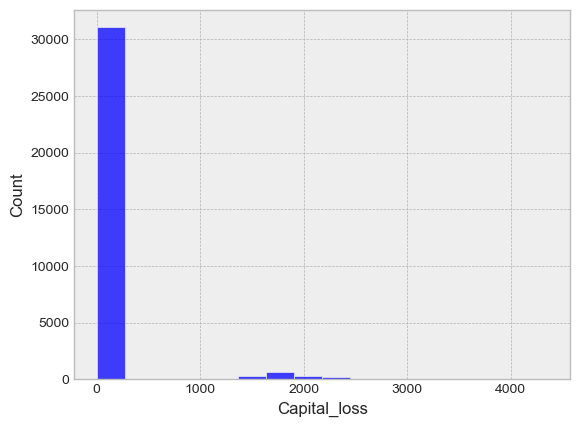

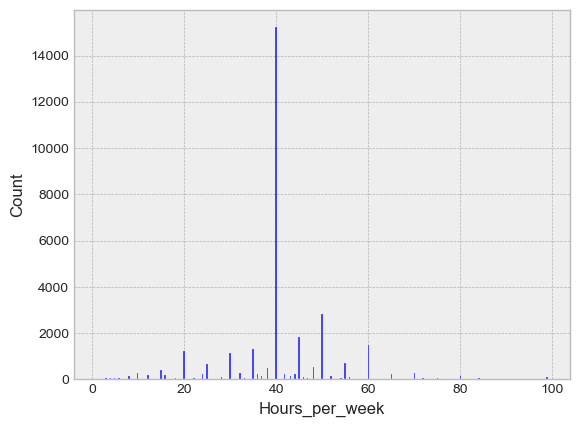

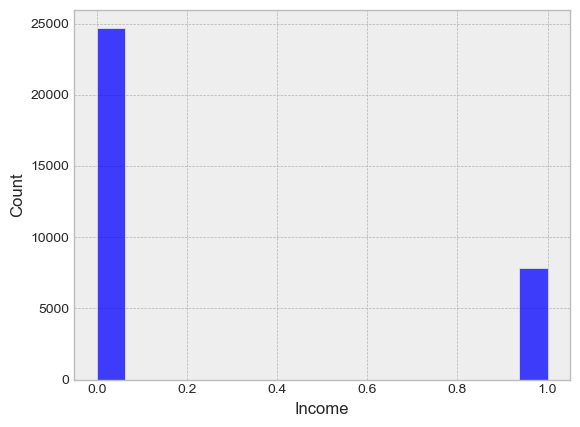

In [72]:
for i in num:
    sns.histplot(df[i])
    plt.show()

# Label Encoding for categorical features

In [73]:
from sklearn.preprocessing import LabelEncoder

In [75]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [76]:
for i in df.columns:
    if df[i].dtypes =='object':
        le=LabelEncoder()
        df[i]= le.fit_transform(df[i])

In [77]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
1,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
2,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
3,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0
4,37,3,284582,12,14,2,3,5,4,0,0,0,40,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,3,257302,7,12,2,12,5,4,0,0,0,38,38,0
32556,40,3,154374,11,9,2,6,0,4,1,0,0,40,38,1
32557,58,3,151910,11,9,6,0,4,4,0,0,0,40,38,0
32558,22,3,201490,11,9,4,0,3,4,1,0,0,20,38,0


<AxesSubplot:>

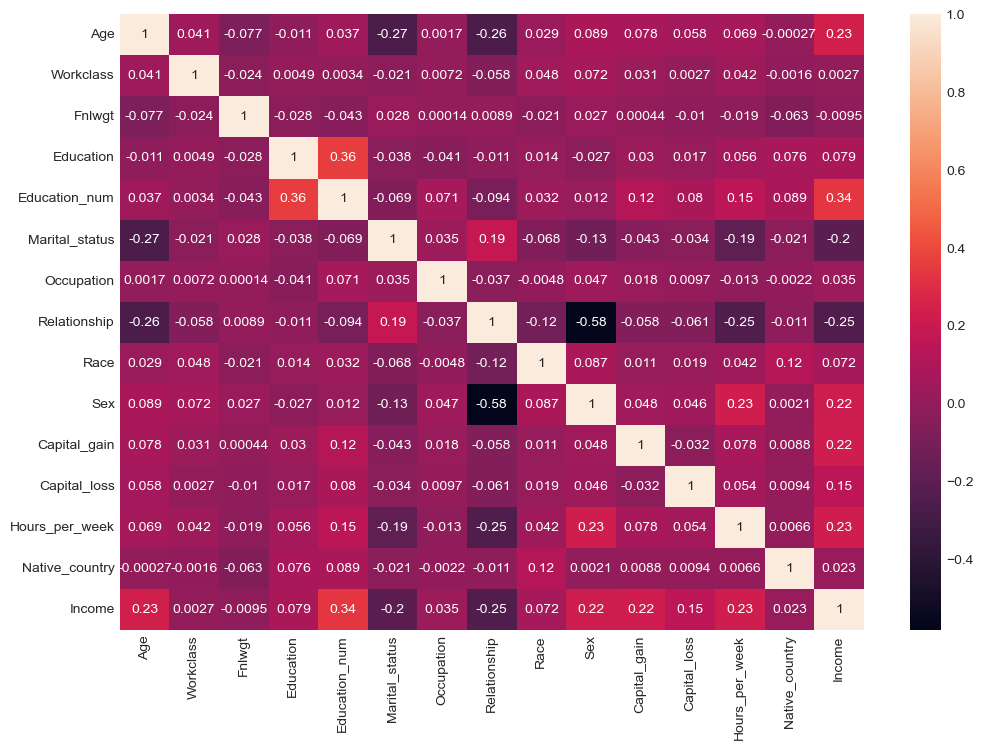

In [78]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

 Correlation after encoding with Target variable

Few features are  very low correlated with target variable,

# Split independent and dependent features

In [79]:
X=df.drop('Income', axis=1)
Y=df['Income']

In [80]:
X.shape , Y.shape

((32560, 14), (32560,))

# Extra Tree Classifier for Feature Selection

In [81]:
from sklearn.ensemble import ExtraTreesClassifier
select= ExtraTreesClassifier()
select.fit(X,Y)

ExtraTreesClassifier()

In [82]:
add=select.feature_importances_

In [83]:
for index,feature_imp in enumerate(select.feature_importances_):
    print(index , feature_imp)

0 0.15377668918849102
1 0.04134918843123224
2 0.16846252434856795
3 0.035129782763426896
4 0.09138894126211303
5 0.07937387536137845
6 0.07279651915812617
7 0.08445531747325011
8 0.01494942643641455
9 0.029981479633533776
10 0.08917992737620158
11 0.028986721873565727
12 0.09486872123897523
13 0.015300885454723316


In [84]:
imp_feature=pd.DataFrame()
imp_feature['Feature']= X.columns
imp_feature['Values']=select.feature_importances_

In [85]:
imp_feature.sort_values('Values',ascending=False)

,Feature,Values
2,Fnlwgt,0.168463
0,Age,0.153777
12,Hours_per_week,0.094869
4,Education_num,0.091389
10,Capital_gain,0.089180
7,Relationship,0.084455
5,Marital_status,0.079374
6,Occupation,0.072797
1,Workclass,0.041349
3,Education,0.035130


In [86]:
16.7+15.7+9.5+8.8+8.8+8.7+7.6+7.3+4.1+3.7+2.8+2.7

96.39999999999999

12 features explanes the variation 96.3%, we can drop last 2 features

In [88]:
X=X.drop(['Native_country','Race'], axis=1)

In [89]:
X.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Sex,Capital_gain,Capital_loss,Hours_per_week
0,50,5,83311,9,13,2,3,0,1,0,0,13
1,38,3,215646,11,9,0,5,1,1,0,0,40
2,53,3,234721,1,7,2,5,0,1,0,0,40
3,28,3,338409,9,13,2,9,5,0,0,0,40
4,37,3,284582,12,14,2,3,5,0,0,0,40


# Scaling()

In [90]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [91]:
X=sc.fit_transform(X)

In [92]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.837097,1.721336,-1.008742,-0.335443,1.134779,-0.406183,-0.790156,-0.900177,0.703087,-0.145914,-0.216663,-2.222120
1,-0.042640,-0.085223,0.245046,0.181319,-0.420027,-1.734026,-0.286703,-0.277810,0.703087,-0.145914,-0.216663,-0.035430
2,1.057031,-0.085223,0.425770,-2.402489,-1.197429,-0.406183,-0.286703,-0.900177,0.703087,-0.145914,-0.216663,-0.035430
3,-0.775755,-0.085223,1.408146,-0.335443,1.134779,-0.406183,0.720204,2.211658,-1.422298,-0.145914,-0.216663,-0.035430
4,-0.115952,-0.085223,0.898170,0.439700,1.523480,-0.406183,-0.790156,2.211658,-1.422298,-0.145914,-0.216663,-0.035430
...,...,...,...,...,...,...,...,...,...,...,...,...
32555,-0.849066,-0.085223,0.639710,-0.852204,0.746077,-0.406183,1.475385,2.211658,-1.422298,-0.145914,-0.216663,-0.197407
32556,0.103982,-0.085223,-0.335466,0.181319,-0.420027,-0.406183,-0.034976,-0.900177,0.703087,-0.145914,-0.216663,-0.035430
32557,1.423589,-0.085223,-0.358811,0.181319,-0.420027,2.249503,-1.545336,1.589291,-1.422298,-0.145914,-0.216663,-0.035430
32558,-1.215624,-0.085223,0.110927,0.181319,-0.420027,0.921660,-1.545336,0.966924,0.703087,-0.145914,-0.216663,-1.655200


# Balance Dataset

In [93]:
from imblearn.over_sampling import SMOTE
smt=SMOTE()

In [94]:
Y.value_counts()*100

0    2471900
1     784100
Name: Income, dtype: int64

In [95]:
Y.value_counts(normalize=True)*100

0    75.918305
1    24.081695
Name: Income, dtype: float64

In [96]:
 balanced_X,balanced_Y=smt.fit_resample(X,Y)

In [97]:
balanced_X.shape  , balanced_Y.shape

((49438, 12), (49438,))

In [98]:
balanced_Y.value_counts(normalize=True)*100

0    50.0
1    50.0
Name: Income, dtype: float64

# Train-Test Split

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score

Try to  Find best random state

In [101]:
# FInd best Random_state

maxaccu=0
maxRS=0

for i in range(0,200):
    x_train,x_test,y_train,y_test= train_test_split(balanced_X,balanced_Y,random_state=i,test_size=.20)
    LR= LogisticRegression()
    LR.fit(x_train,y_train)
    pred= LR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxaccu:
        maxaccu=acc
        maxRS=i
print("Best accuracy is ",maxaccu,"on Random State =",maxRS)

Best accuracy is  0.7777103559870551 on Random State = 130


# Use, Random state= 23

In [102]:
x_train,x_test,y_train,y_test= train_test_split(balanced_X,balanced_Y,random_state=23,test_size=.3)

In [103]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [107]:
LR_model= LogisticRegression()
RD_model= RidgeClassifier()
DT_model= DecisionTreeClassifier()
SV_model= SVC()
KNR_model= KNeighborsClassifier()
RFR_model= RandomForestClassifier()
XGB_model= XGBClassifier()
SGH_model= SGDClassifier()
Bag_model=BaggingClassifier()
ADA_model=AdaBoostClassifier()
GB_model= GradientBoostingClassifier()

model=[LR_model,RD_model,DT_model,SV_model,KNR_model,RFR_model,XGB_model,SGH_model,Bag_model,ADA_model,GB_model ]

In [108]:
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    pred= m.predict(x_test)
    print('Accuracy_Score of ',m, 'is', accuracy_score(y_test,pred)*100)
    print("F1 SCore                ", f1_score(y_test,pred)*100)
    print('Confusion Matrix of ',m,' is \n', confusion_matrix(y_test,pred) )
    print(classification_report(y_test,pred))
    print('*'*50)

Accuracy_Score of  LogisticRegression() is 77.34627831715211
F1 SCore                 77.19250610915014
Confusion Matrix of  LogisticRegression()  is 
 [[5786 1666]
 [1694 5686]]
              precision    recall  f1-score   support

           0       0.77      0.78      0.77      7452
           1       0.77      0.77      0.77      7380

    accuracy                           0.77     14832
   macro avg       0.77      0.77      0.77     14832
weighted avg       0.77      0.77      0.77     14832

**************************************************
Accuracy_Score of  RidgeClassifier() is 76.10571736785329
F1 SCore                 76.56704575509124
Confusion Matrix of  RidgeClassifier()  is 
 [[5498 1954]
 [1590 5790]]
              precision    recall  f1-score   support

           0       0.78      0.74      0.76      7452
           1       0.75      0.78      0.77      7380

    accuracy                           0.76     14832
   macro avg       0.76      0.76      0.76     1483

# Cross Validation

In [110]:
from sklearn.model_selection import cross_val_score

In [111]:
for i in model:
    print('Accuracy_Score of ',i, 'is', accuracy_score(y_test,i.predict(x_test))*100)
    print("cross Validation accuracy score of ",i ," is ",cross_val_score(i,balanced_X,balanced_Y,cv=5, scoring='accuracy').mean()*100)
    print('*'*50)

Accuracy_Score of  LogisticRegression() is 77.34627831715211
cross Validation accuracy score of  LogisticRegression()  is  76.7203321480955
**************************************************
Accuracy_Score of  RidgeClassifier() is 76.10571736785329
cross Validation accuracy score of  RidgeClassifier()  is  75.68065581196976
**************************************************
Accuracy_Score of  DecisionTreeClassifier() is 84.44579288025889
cross Validation accuracy score of  DecisionTreeClassifier()  is  85.08449177158198
**************************************************
Accuracy_Score of  SVC() is 82.59843581445523
cross Validation accuracy score of  SVC()  is  83.11219920211661
**************************************************
Accuracy_Score of  KNeighborsClassifier() is 85.20765911542611
cross Validation accuracy score of  KNeighborsClassifier()  is  86.1726168732568
**************************************************
Accuracy_Score of  RandomForestClassifier() is 89.37432578209277
c

# Hypertuning

In [112]:
n_estimator= [200, 400, 600, 800, 1000]  # no of tree in Random forest, default is 100
max_features= ['auto','sqrt','log2']  # mini no of features to create Decission Tree
max_depth=[10, 64, 118, 173, 227, 282, 336]  #  Max depth of decision tree
min_samples_split= [1,2,3]   # mini no of sample rerquired to split node
min_samples_leaf= [1,3,4,6,7,9]  #mini no of sample required at each leaf node

param_grid= {'n_estimators': n_estimator,
             'max_features':max_features,
             'max_depth':max_depth,
             'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf,
             }
param_grid

{'n_estimators': [200, 400, 600, 800, 1000],
 'max_features': ['auto', 'sqrt', 'log2'],
 'max_depth': [10, 64, 118, 173, 227, 282, 336],
 'min_samples_split': [1, 2, 3],
 'min_samples_leaf': [1, 3, 4, 6, 7, 9]}

In [113]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [114]:
random= RandomizedSearchCV(RFR_model,param_distributions=param_grid,cv=5,n_jobs=-1)
random.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [10, 64, 118, 173, 227,
                                                      282, 336],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 3, 4, 6, 7, 9],
                                        'min_samples_split': [1, 2, 3],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000]})

In [115]:
random.best_estimator_

RandomForestClassifier(max_depth=173, max_features='log2', n_estimators=400)

In [116]:
random.best_params_

{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 173}

In [117]:
print('Random Forest Classifier:')
print('Accuracy score:', round(accuracy_score(y_test,pred) * 100, 2))
print('F1 score:', round(f1_score(y_test,pred) * 100, 2))

Random Forest Classifier:
Accuracy score: 86.34
F1 score: 86.71


In [118]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[6199, 1253],
       [ 773, 6607]], dtype=int64)

<AxesSubplot:>

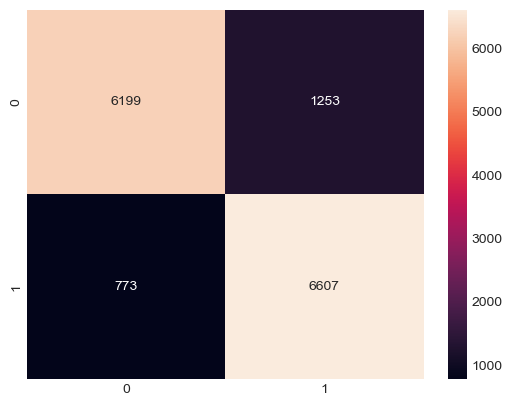

In [119]:
sns.heatmap(confusion_matrix(y_test,pred),annot=True, fmt='d')

In [120]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86      7452
           1       0.84      0.90      0.87      7380

    accuracy                           0.86     14832
   macro avg       0.86      0.86      0.86     14832
weighted avg       0.86      0.86      0.86     14832



In [141]:
import joblib
joblib.dump(random.best_estimator_,'Income_Prediction.pkl')

['Income_Prediction.pkl']